# MATH 210 Introduction to Mathematical Computing

## November 1, 2019

* Interpolation
* Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Interpolation

Given $N+1$ points $(x_0,y_0),\dots,(x_N,y_N)$, there is a unique polynimial of degree $N$ which passes through these points. We solve for the coefficients $\mathbf{a} = [a_0 \ \cdots \ a_N]^T$ by solve the system $X \mathbf{a} = \mathbf{y}$ where $X$ is the [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) associated with the $x$ values.

NumPy has fucntion for generating the Vandermonde matrix. Check the documentation.

In [2]:
np.vander?

The default behaviour gives the powers of $x$ in the opposite order from our convention. So we specify `increasing=True`.

Let's interpolate $N+1$ random points.

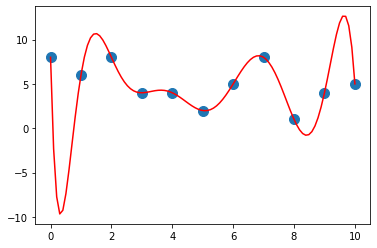

In [6]:
N = 10
x = np.arange(0,N+1)
y = np.random.randint(0,10,N+1)
X = np.vander(x,increasing=True)
a = la.solve(X,y)
xs = np.linspace(0,N,100)
ys = sum([a[k]*xs**k for k in range(0,N+1)])
plt.plot(x,y,'.',markersize=20)
plt.plot(xs,ys,'r')

[Lagrange inpterpolation](https://en.wikipedia.org/wiki/Lagrange_polynomial) doesn't work well in practice! Small changes in the points create large changes in the solution! And also it's over-fitting. We should use linear regression on large data.

For example, the polynimial $y=x^3$ fits the data $(-2,-8),(-1,-1),(0,0),(1,1),(2,8)$. But if we change one of the $y$ values, we get a totally different polynomial!

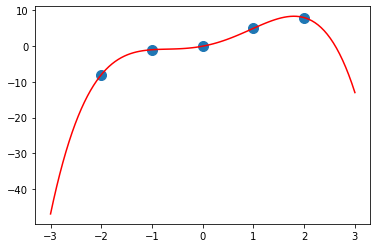

In [8]:
x = np.arange(-2,3)
y = np.array([-8,-1,0,5,8])
X = np.vander(x,increasing=True)
a = la.solve(X,y)
xs = np.linspace(-3,3,100)
ys = sum([a[k]*xs**k for k in range(0,len(a))])
plt.plot(x,y,'.',markersize=20)
plt.plot(xs,ys,'r')

## Linear Regression

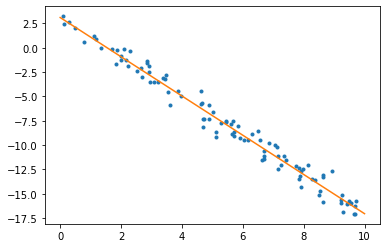

In [9]:
N = 100
x = np.random.rand(N)*10
y = 3 - 2*x + 0.75*np.random.randn(N)
X = np.column_stack((np.ones(N),x))
a = la.solve(X.T@X,X.T@y)
xs = np.linspace(0,10,100)
ys = sum([a[k]*xs**k for k in range(0,len(a))])
plt.plot(x,y,'.')
plt.plot(xs,ys)

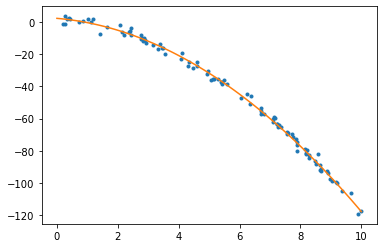

In [10]:
N = 100
x = np.random.rand(N)*10
y = 3 - 2*x - x**2 + 2*np.random.randn(N)
X = np.column_stack((np.ones(N),x,x**2))
a = la.solve(X.T@X,X.T@y)
xs = np.linspace(0,10,100)
ys = sum([a[k]*xs**k for k in range(0,len(a))])
plt.plot(x,y,'.')
plt.plot(xs,ys)